In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.stats as stats
import statistics
import re
from tensorflow import keras

In [2]:
def recode_var(Vars):
    if Vars == 1: return 'Temp'
    if Vars == 2: return 'Temp + Meteo'
    if Vars == 3: return 'All'

### Gráficas de temp

In [50]:
df = pd.read_csv('model-temp-results_metrics.csv', sep=";")
df['CVRMSE'] = df['CVRMSE'].round(3)
df['R2'] = df['R2'].round(3)
df['RMSE'] = df['RMSE'].round(3)
#df = df.where(df['Modelo']== 'CNN-LSTM').dropna()
df = df.sort_values(by=['steps_pred','n_obs_despues', 'Variables'])
df['Variables'] = df['Variables'].apply(recode_var)
df = df.astype({"steps_pred":"int","n_obs_despues":"int", "n_obs_antes":"int"})
df = df.reset_index(drop=True)
#df.to_csv('model-temp-results_metrics.csv', sep=";", index=False)

In [51]:
df = df.where(df['steps_pred']==12).dropna()
df = df.sort_values(by='CVRMSE')
df = df.astype({"steps_pred":"int","n_obs_despues":"int", "n_obs_antes":"int"})
df = df.iloc[:5]
df

,Modelo,Variables,steps_pred,n_obs_despues,n_obs_antes,CVRMSE,R2,RMSE
91,LSTM,Temp + Meteo,12,12,1,0.842,0.990,0.241
98,CNN-LSTM,Temp + Meteo,12,12,3,0.873,0.990,0.248
80,LSTM,Temp,12,12,6,0.923,0.988,0.263
109,GRU,All,12,12,6,0.985,0.980,0.281
101,BiLSTM,Temp + Meteo,12,12,3,0.988,0.988,0.282


In [191]:
df = pd.read_csv('model-temp-results_preds.csv', sep=";")
#Model - steps_pred - obs_despues - obs_antes
df = df.where(df['Prueba']=='CNN-LSTM-2-12-12-3').dropna()
differences = df['difference']
test_y = df['test_y']
prediction = df['prediction']

In [184]:
df

,Prueba,test_y,prediction,difference
7337,CNN-LSTM-3-6-6-3,"[24.9, 25.2, 25.5, 25.7, 25.8, 26.0]","[24.93000030517578, 25.18000030517578, 25.4400...",0.05
7338,CNN-LSTM-3-6-6-3,"[27.9, 27.3, 26.8, 26.4, 26.0, 25.6]","[28.18000030517578, 27.350000381469727, 26.430...",0.21
7339,CNN-LSTM-3-6-6-3,"[24.3, 25.0, 25.2, 25.6, 25.5, 26.0]","[24.149999618530273, 24.3799991607666, 24.8799...",0.38
7340,CNN-LSTM-3-6-6-3,"[29.6, 30.0, 30.1, 30.1, 30.0, 30.0]","[29.190000534057617, 29.709999084472656, 30.12...",0.18
7341,CNN-LSTM-3-6-6-3,"[26.3, 26.8, 27.2, 27.3, 27.6, 27.7]","[26.3700008392334, 26.610000610351562, 27.2000...",0.12
...,...,...,...,...
7426,CNN-LSTM-3-6-6-3,"[30.9, 30.9, 31.4, 31.6, 31.8, 31.9]","[30.809999465942383, 31.0, 31.030000686645508,...",0.14
7427,CNN-LSTM-3-6-6-3,"[28.6, 27.9, 28.4, 28.7, 28.9, 29.5]","[28.350000381469727, 28.760000228881836, 28.13...",0.34
7428,CNN-LSTM-3-6-6-3,"[26.5, 25.9, 25.5, 25.2, 24.9, 24.6]","[26.280000686645508, 25.950000762939453, 25.25...",0.28
7429,CNN-LSTM-3-6-6-3,"[28.5, 28.5, 28.9, 29.0, 29.0, 28.9]","[28.520000457763672, 28.68000030517578, 28.840...",0.13


In [192]:
def str_to_floats(preds):
    floats_list = []
    for item in pd.Series(preds).iloc[0].strip("[]").split(","): floats_list.append(float(item))
    return np.array(floats_list)

In [193]:
test_y = test_y.apply(str_to_floats)
prediction = prediction.apply(str_to_floats)

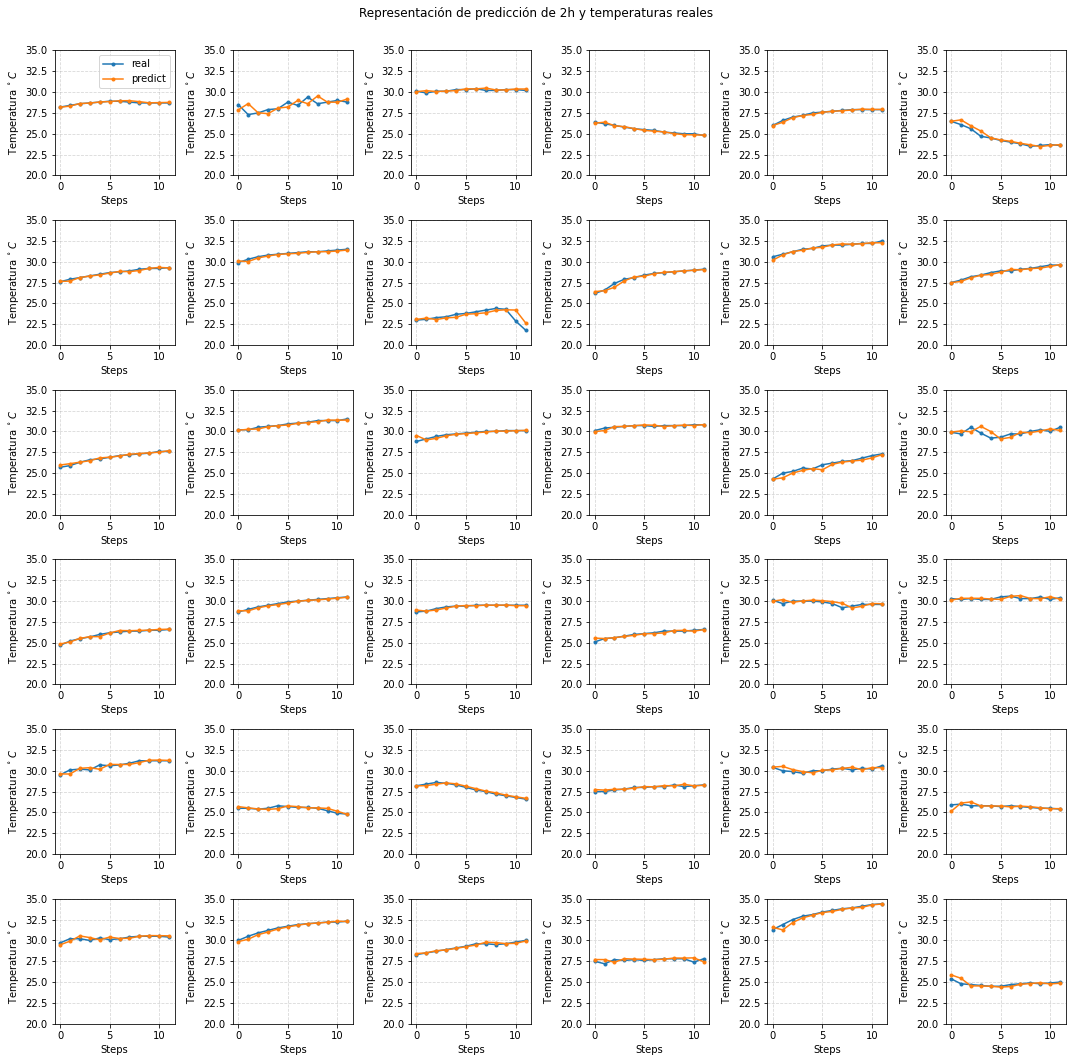

In [194]:
fig, axs = plt.subplots(figsize=(15,15), nrows = 6, ncols = 6)
i=0
j=0
k=0
for i in range(0,6):
    for j, k in enumerate(range(k,k+6)):
        #print([i,j,k])
        axs[i,j].plot(test_y.iloc[k+i], label = 'real', marker='.')
        axs[i,j].plot(prediction.iloc[k+i], label = 'predict', marker='.')
        axs[i,j].set_ylim(20,35)
        axs[i,j].set_xlabel('Steps')
        axs[i,j].set_ylabel('Temperatura $^\circ C$')
        axs[i,j].grid(linestyle = "--", alpha=0.5)
        axs[0,0].legend()
    fig.suptitle('Representación de predicción de 2h y temperaturas reales')
    fig.tight_layout()
    fig.subplots_adjust(top=0.94)
plt.show()

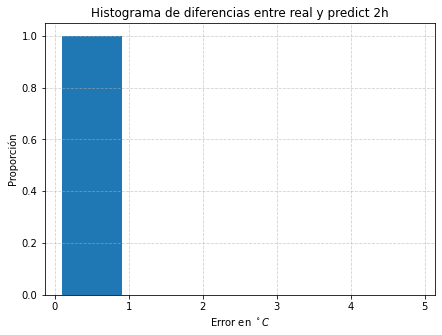

In [195]:
fig = plt.figure(figsize =(7, 5))
plt.grid(linestyle = "--", alpha=0.6)
plt.xticks(np.arange(0, 6, 1))
plt.hist(differences, bins=[0,1,2,3,4,5] , density=True, rwidth=0.8, align='mid')
plt.title("Histograma de diferencias entre real y predict 2h")
plt.xlabel('Error en $^\circ C$')
plt.ylabel('Proporción')
plt.show()

### Gráficas de cons

In [256]:
df = pd.read_csv('model-cons-results_metrics.csv', sep=";")
df

,Modelo,Edificio,Variables,pred,n_obs_antes,CVRMSE,R2,RMSE
0,MLP,A,1,60T,1,8.943381,0.937301,0.265341
1,MLP,A,2,60T,1,9.018385,0.936245,0.267566
2,MLP,A,1,60T,2,8.944095,0.937349,0.265295
3,MLP,A,2,60T,2,27.317657,0.415557,0.810281
4,MLP,A,1,60T,4,11.034441,0.904763,0.327074
...,...,...,...,...,...,...,...,...
175,CNN-LSTM,C,2,120T,1,41.555126,0.746453,1.151205
176,CNN-LSTM,C,1,120T,2,32.888643,0.841538,0.910896
177,CNN-LSTM,C,2,120T,2,48.636307,0.653460,1.347049
178,CNN-LSTM,C,1,120T,4,37.051003,0.799385,1.026711


In [272]:
df = pd.read_csv('model-cons-results_metrics.csv', sep=";")
df['CVRMSE'] = df['CVRMSE'].round(3)
df['R2'] = df['R2'].round(3)
df['RMSE'] = df['RMSE'].round(3)
#df = df.where(df['Modelo']== 'CNN-LSTM').dropna()
df = df.where((df['Edificio']=='C') & (df['pred']=='60T')).dropna()
df = df.sort_values(by='R2')
def recode_var(Vars):
    if Vars == 1: return 'dif_cons + V4'
    if Vars == 2: return 'All'
df['Variables'] = df['Variables'].apply(recode_var)
df = df.astype({"n_obs_antes":"int"})
#df = df.reset_index(drop=True)
df

,Modelo,Edificio,Variables,pred,n_obs_antes,CVRMSE,R2,RMSE
97,GRU,C,All,60T,1,180.844,-0.792,3.252
137,BiLSTM,C,All,60T,4,141.111,-0.089,2.539
99,GRU,C,All,60T,2,130.878,0.062,2.354
135,BiLSTM,C,All,60T,2,130.106,0.073,2.340
133,BiLSTM,C,All,60T,1,117.016,0.250,2.104
171,CNN-LSTM,C,All,60T,2,116.814,0.253,2.101
63,LSTM,C,All,60T,2,95.829,0.497,1.723
65,LSTM,C,All,60T,4,86.968,0.586,1.565
173,CNN-LSTM,C,All,60T,4,85.885,0.596,1.545
61,LSTM,C,All,60T,1,80.579,0.644,1.449


In [267]:
df = df.iloc[[0,154,88,166,134,68],:]
df

,Modelo,Edificio,Variables,pred,n_obs_antes,CVRMSE,R2,RMSE
0,MLP,A,dif_cons + V4,60T,1,8.943,0.937,0.265
154,CNN-LSTM,A,dif_cons + V4,120T,4,8.919,0.911,0.522
88,GRU,B,dif_cons + V4,60T,4,6.661,0.986,0.198
166,CNN-LSTM,B,dif_cons + V4,120T,4,7.523,0.981,0.448
134,BiLSTM,C,dif_cons + V4,60T,2,27.695,0.958,0.498
68,LSTM,C,dif_cons + V4,120T,2,28.687,0.879,0.795


In [247]:
df = pd.read_csv('model-cons-results_preds.csv', sep=";")
#df

In [248]:
#Modelo-Edificio-Vars-Time-obs_antes
df = df.where(df['Prueba']== 'CNN-LSTM-C-1-120T-1').dropna()
df = df.reset_index(drop=True)
test_y = df['test_y'].apply(str_to_float)
prediction = df['prediction'].apply(str_to_float)

In [191]:
def str_to_float(number):
    return float(number.strip('[]').strip("''"))

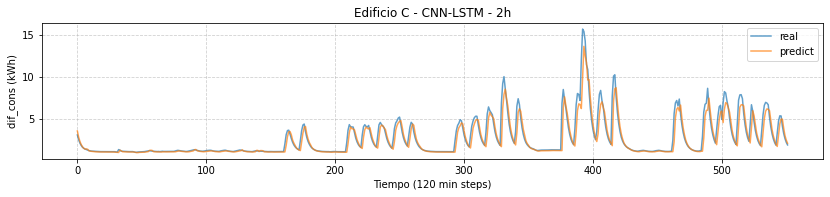

In [249]:
fig, axs = plt.subplots(figsize=(14,2.5), nrows = 1, ncols =1, sharex =False)
axs.plot(test_y, label='real',alpha=0.7)
axs.plot(prediction, label='predict', alpha=0.7)
axs.grid(linestyle = "--", alpha=0.6)
axs.set_xlabel('Tiempo (120 min steps)')
axs.set_ylabel('dif_cons (kWh)')
axs.set_title('Edificio C - CNN-LSTM - 2h')
axs.legend()

In [53]:
import keras.backend as K
model = keras.models.load_model('model_temp_lstm_01_predsteps12_post12_prev1.h5')

In [54]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 32)                4480      
                                                                 
 repeat_vector (RepeatVector  (None, 1, 32)            0         
 )                                                               
                                                                 
 lstm_1 (LSTM)               (None, 1, 128)            82432     
                                                                 
 lstm_2 (LSTM)               (None, 1, 64)             49408     
                                                                 
 dropout (Dropout)           (None, 1, 64)             0         
                                                                 
 time_distributed (TimeDistr  (None, 1, 32)            2080      
 ibuted)                                                

In [56]:
#Para dropout buscar el index de esa capa y sacar el elemento rate
print(model.get_layer(index=4).rate)
#Para learning rate model.optimizer.lr
print(model.optimizer.lr)

0.1
<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=0.001>


#### LaTeX

In [268]:
print(df.to_latex(index=False))

\begin{tabular}{llllrrrr}
\toprule
  Modelo & Edificio &     Variables & pred &  n\_obs\_antes &  CVRMSE &    R2 &  RMSE \\
\midrule
     MLP &        A & dif\_cons + V4 &  60T &            1 &   8.943 & 0.937 & 0.265 \\
CNN-LSTM &        A & dif\_cons + V4 & 120T &            4 &   8.919 & 0.911 & 0.522 \\
     GRU &        B & dif\_cons + V4 &  60T &            4 &   6.661 & 0.986 & 0.198 \\
CNN-LSTM &        B & dif\_cons + V4 & 120T &            4 &   7.523 & 0.981 & 0.448 \\
  BiLSTM &        C & dif\_cons + V4 &  60T &            2 &  27.695 & 0.958 & 0.498 \\
    LSTM &        C & dif\_cons + V4 & 120T &            2 &  28.687 & 0.879 & 0.795 \\
\bottomrule
\end{tabular}

